In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'  # 图片输出为矢量图，保证清晰度

In [3]:
data = pd.read_csv("./RNA_seq.csv")
dataT=np.array(data)
data=dataT.T
co=data[0]
data1=np.delete(data,0,axis=0)
data=data1
datadf= pd.DataFrame(data=data[0:,0:],columns=co)
datadf.head()
data=datadf
data= data.replace("NOTLC",value=0)
data= data.replace("LC",value=1)
X=data.drop(['Group'],axis=1)
y=data['Group']

In [4]:
column=X.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(data=X,columns=column)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (878, 60660)
Test shape: (220, 60660)


In [6]:
from sklearn.base import ClassifierMixin
from sklearn.base import TransformerMixin, BaseEstimator
class MyEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, model, mask) -> None:
        super().__init__()
        self.mask = mask
        self.model = model
    
    def fit(self, X, y=None):
        self.model.fit(X[self.mask],y)
        return self

    def predict(self, X):
        return self.model.predict(X[self.mask])
    
    def predict_proba(self, X):
        return self.model.predict_proba(X[self.mask])
        

In [7]:
from itertools import *
sel_seq_dt_mask=['ENSG00000003147.19','ENSG00000004455.17','ENSG00000006327.14','ENSG00000018510.17','ENSG00000067064.11','ENSG00000154813.10','ENSG00000204305.14','ENSG00000234425.1','ENSG00000262772.2','ENSG00000272477.1']
sel_seq_rf_mask=['ENSG00000106089.12', 'ENSG00000204305.14', 'ENSG00000223982.3','ENSG00000229693.2']
sel_seq_ada_mask=['ENSG00000000005.6', 'ENSG00000002933.9','ENSG00000019144.19', 'ENSG00000070366.14','ENSG00000091262.16','ENSG00000106089.12','ENSG00000204305.14','ENSG00000233117.4']
sel_seq_gnb_mask=['ENSG00000011052.21','ENSG00000052841.15','ENSG00000062194.16','ENSG00000068001.14','ENSG00000102871.16','ENSG00000124532.15', 'ENSG00000204305.14', 'ENSG00000227066.2']
sel_seq_xgb_mask=['ENSG00000106089.12','ENSG00000138346.15','ENSG00000204305.14']

feature=list(set(sel_seq_dt_mask+sel_seq_rf_mask+sel_seq_ada_mask+sel_seq_gnb_mask+sel_seq_xgb_mask))
model_dt_fs = MyEstimator(DecisionTreeClassifier(), sel_seq_dt_mask)
model_rf_fs = MyEstimator(RandomForestClassifier(), sel_seq_rf_mask)
model_ada_fs = MyEstimator(AdaBoostClassifier(), sel_seq_ada_mask)
model_gnb_fs = MyEstimator(GaussianNB(), sel_seq_gnb_mask)
model_xgb_fs = MyEstimator(XGBClassifier(), mask=sel_seq_xgb_mask)
from sklearn.ensemble import VotingClassifier
model_voting = VotingClassifier([
    ("dt",model_dt_fs),
    ("rf",model_rf_fs ),
    ("ada", model_ada_fs),
    ("gnb",model_gnb_fs),
    ("xgb", model_xgb_fs)
], voting="hard")

In [8]:
fea=feature+['Group']
dataset=data[fea]

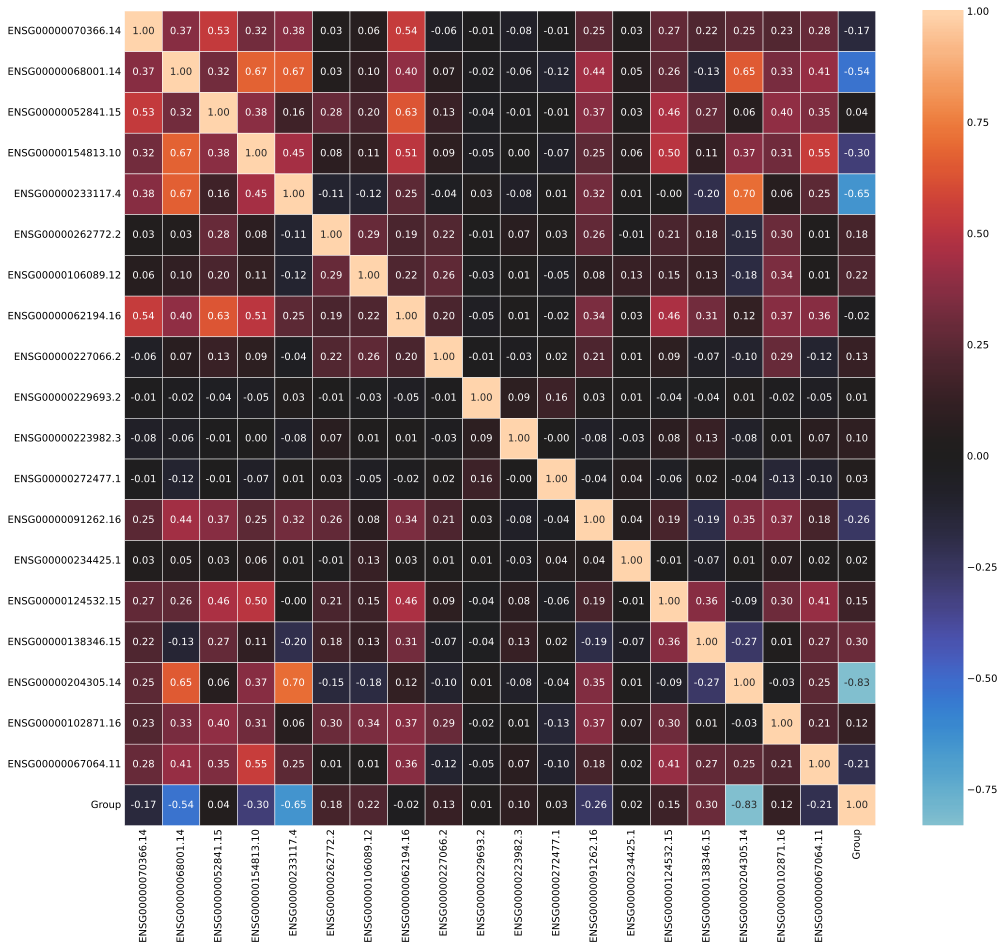

In [9]:
import seaborn as sns
corr_matrix=dataset.corr()
f, ax = plt.subplots(figsize=(15, 15))
#sns.heatmap(corr_matrix,linewidths=0.5,annot=True,fmt=".2f",linecolor='white',yticklabels=True,center=0,cmap='YlGnBu')
sns.heatmap(corr_matrix,linewidths=0.5,annot=True,fmt=".2f",linecolor='white',yticklabels=True,center=0)
plt.savefig('E:/lung_cancer_prediction/images/TCGA_RNAseq/heatmap.png', dpi=500, bbox_inches='tight',facecolor='white') 
plt.show()